# Linear Regression with python
Predictive analysis using supervised machine learning

### Import the libraries

In [6]:
import warnings
warnings.simplefilter('ignore')

### Import numpy and pandas

In [22]:
import numpy as np
import pandas as pd

### Import Data visualisation library

In [8]:
#import data visulaisation library
import matplotlib.pyplot as plt
%matplotlib inline

### Import the dataset

In [272]:

dataset=pd.read_csv(r'C:\Users\Srilaptop\OneDrive\VAC Dataset\KAG_energydata_complete.csv',nrows=500)
dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2016-01-15 03:30:00,60,0,23.133333,39.433333,22.166667,39.090000,21.20,43.500000,18.390000,...,17.290000,47.70,2.000000,750.450000,87.500000,10.500000,24.000000,0.100000,22.978771,22.978771
496,2016-01-15 03:40:00,50,0,23.100000,39.450000,22.100000,39.090000,21.23,43.530000,18.390000,...,17.290000,47.70,2.233333,750.566667,86.000000,10.333333,24.333333,0.066667,21.701542,21.701542
497,2016-01-15 03:50:00,50,0,23.000000,39.400000,22.000000,39.090000,21.29,43.590000,18.323333,...,17.290000,47.70,2.466667,750.683333,84.500000,10.166667,24.666667,0.033333,25.850491,25.850491
498,2016-01-15 04:00:00,40,0,22.926667,39.400000,21.926667,39.090000,21.29,43.590000,18.390000,...,17.290000,47.70,2.700000,750.800000,83.000000,10.000000,25.000000,0.000000,42.312288,42.312288


### Understanding the dataset

In [273]:
dataset.shape

(500, 29)

In [274]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [275]:
print(dataset.isnull().sum())

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [276]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Slicing the dataset

In [277]:
dataset=dataset.drop(['date','lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6','T7','RH_7','T8','RH_8','T9','RH_9', 'T_out','Press_mm_hg', 'RH_out',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],axis=1,errors='ignore')#errors='ignore' is given to ignore the key error:LOR not found in axis

In [278]:
dataset

,Appliances,Windspeed
0,60,7.000000
1,60,6.666667
2,50,6.333333
3,50,6.000000
4,60,5.666667
...,...,...
495,60,10.500000
496,50,10.333333
497,50,10.166667
498,40,10.000000


### Segregate and shape the variables

In [317]:
x=dataset.iloc[:,-1] #here x is windspeed

In [318]:
x

0       7.000000
1       6.666667
2       6.333333
3       6.000000
4       5.666667
         ...    
495    10.500000
496    10.333333
497    10.166667
498    10.000000
499    10.000000
Name: Windspeed, Length: 500, dtype: float64

In [319]:
x.shape

(500,)

In [328]:
x=dataset.iloc[:,-1].values.reshape(-1,1)#reshaping the data, so that it can be in a dataframe

In [329]:
x.shape

(500, 1)

In [330]:
x

array([[ 7.        ],
       [ 6.66666667],
       [ 6.33333333],
       [ 6.        ],
       [ 5.66666667],
       [ 5.33333333],
       [ 5.        ],
       [ 5.16666667],
       [ 5.33333333],
       [ 5.5       ],
       [ 5.66666667],
       [ 5.83333333],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6.16666667],
       [ 6.33333333],
       [ 6.5       ],
       [ 6.66666667],
       [ 6.83333333],
       [ 7.        ],
       [ 6.83333333],
       [ 6.66666667],
       [ 6.5       ],
       [ 6.33333333],
       [ 6.16666667],
       [ 6.        ],
       [ 6.        ],
       [ 6.        ],
       [ 6

In [325]:
y=dataset.iloc[:,0].values.reshape(-1,1) #here y is appliances energy

In [331]:
y.shape

(500, 1)

In [332]:
y

array([[ 60],
       [ 60],
       [ 50],
       [ 50],
       [ 60],
       [ 50],
       [ 60],
       [ 60],
       [ 60],
       [ 70],
       [230],
       [580],
       [430],
       [250],
       [100],
       [100],
       [ 90],
       [ 70],
       [ 80],
       [140],
       [120],
       [190],
       [110],
       [110],
       [110],
       [110],
       [100],
       [100],
       [100],
       [100],
       [110],
       [400],
       [400],
       [390],
       [240],
       [ 60],
       [ 60],
       [ 60],
       [ 50],
       [ 70],
       [ 60],
       [ 40],
       [ 40],
       [ 30],
       [ 40],
       [ 50],
       [310],
       [380],
       [380],
       [370],
       [120],
       [ 50],
       [ 40],
       [ 50],
       [ 40],
       [ 50],
       [ 50],
       [ 50],
       [ 40],
       [ 40],
       [ 30],
       [ 20],
       [ 20],
       [ 40],
       [ 50],
       [ 50],
       [ 40],
       [ 50],
       [ 40],
       [ 40],
       [ 40],
      

### Scatter plot

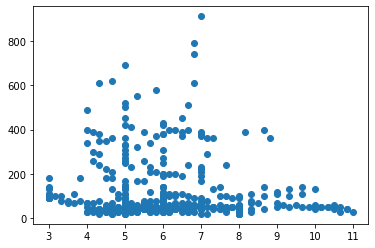

In [353]:
plt.scatter(x,y)
plt.show()

### Divide the dataset into training and test set

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [336]:
x_train.shape

(400, 1)

In [337]:
x_test.shape

(100, 1)

In [338]:
y_train.shape

(400, 1)

In [339]:
y_test.shape

(100, 1)

### Perform the linear regression

In [340]:
from sklearn.linear_model import LinearRegression

In [341]:
lm= LinearRegression()

### Train the model-Linear Regression

In [342]:
lm.fit(x_train,y_train)

LinearRegression()

### Predict the chance of admit

In [343]:
y_pred=lm.predict(x_test)

In [344]:
y_pred

array([[121.51802425],
       [118.82564769],
       [130.94134222],
       [104.0175766 ],
       [ 94.59425864],
       [113.44089457],
       [121.51802425],
       [ 77.09381098],
       [109.40232973],
       [109.40232973],
       [128.24896566],
       [121.51802425],
       [113.44089457],
       [137.67228362],
       [109.40232973],
       [120.17183597],
       [105.36376488],
       [120.17183597],
       [110.74851801],
       [106.70995316],
       [ 97.2866352 ],
       [121.51802425],
       [129.59515394],
       [121.51802425],
       [113.44089457],
       [113.44089457],
       [113.44089457],
       [116.13327113],
       [121.51802425],
       [120.17183597],
       [110.74851801],
       [105.36376488],
       [ 99.97901176],
       [ 97.2866352 ],
       [ 91.90188207],
       [ 73.05524614],
       [121.51802425],
       [ 94.59425864],
       [120.17183597],
       [126.90277738],
       [116.13327113],
       [113.44089457],
       [120.17183597],
       [104

### Checking the prediction

In [345]:
check=pd.DataFrame(x_test,columns=['Windspeed'])

In [346]:
check['Actual appliance energy']=y_test

In [347]:
check['Predicted appliances energy']=y_pred

In [348]:
check

,Windspeed,Actual appliance energy,Predicted appliances energy
0,5.000000,140,121.518024
1,5.333333,50,118.825648
2,3.833333,80,130.941342
3,7.166667,360,104.017577
4,8.333333,80,94.594259
...,...,...,...
95,9.000000,70,89.209506
96,4.666667,50,124.210401
97,6.333333,100,110.748518
98,4.000000,30,129.595154


### Visualize the regressor line

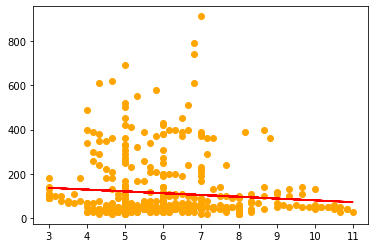

In [351]:
plt.scatter(x,y,color='orange')
plt.plot(x_test,y_pred,color='red')

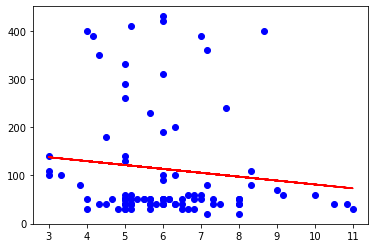

In [352]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')